In [1]:
%pip install celluloid

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from celluloid import Camera
from IPython.display import HTML

%matplotlib inline

In [3]:
train_root_1 = Path("/kaggle/input/liversegtrainimages1/")
train_root_2 = Path("/kaggle/input/liversegtrainimages2/")
train_label = Path("/kaggle/input/liversegtrainlabels/")

In [4]:
def change_img_to_label_path(img_path: Path, label_root: Path = train_label) -> Path:
    return label_root / img_path.name

```python
label_root = Path("/kaggle/input/liversegtrainlabels/")
img_path = Path("/kaggle/input/liversegtrainimages1/liver_001.nii.gz")

print(img_path.name)                 # "liver_001.nii.gz"
print(label_root / img_path.name)    # "/kaggle/input/liversegtrainlabels/liver_001.nii.gz"
```

In [5]:
sample_path_img = list(train_root_1.glob("liver*"))[0]
sample_path_label = change_img_to_label_path(sample_path_img)

In [6]:
ct = nib.load(sample_path_img).get_fdata()
mask = nib.load(sample_path_label).get_fdata().astype(int)

In [7]:
ct.shape

(512, 512, 240)

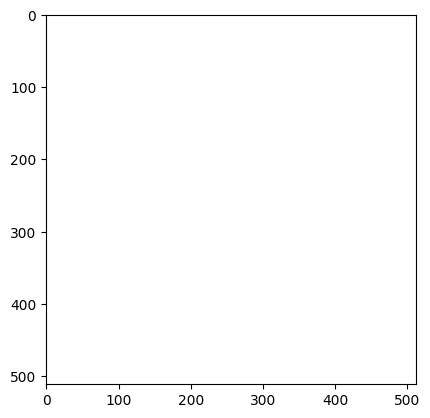

In [8]:
fig = plt.figure()
camera = Camera(fig)

for i in range(ct.shape[2]):
    plt.imshow(ct[:,:,i], cmap = "bone")
    mask_ = np.ma.masked_where(mask[:,:,i] == 0, mask[:,:,i])
    plt.imshow(mask_, alpha = 0.5)
    camera.snap()

animation = camera.animate()

In [9]:
HTML(animation.to_html5_video())